In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
csv_file_path = '../data/survey_response.csv'
df = pd.read_csv(csv_file_path, index_col='id')
df

,survey,sessionId,rotation_state,age_group,gender,reading_platform,book_frequency,genre
id,,,,,,,,
29,Survey (24 Questions),5cl7v69x,IIUU,35-44,['Man'],['E-books'],10-14,"['History', 'Classics/literature', 'Political'..."
30,Survey (24 Questions),j1xox6du,IIUU,18-24,['Man'],['Physical books'],0-4,"['Science fiction', 'Fantasy']"
31,Survey (24 Questions),jfna7x7m,IIUU,18-24,['Man'],['Physical books'],5-9,"['Science fiction', 'Classics/literature', 'Po..."
44,Survey (24 Questions),xih9ubqs,ALSUU,35-44,['Woman'],['E-books'],More than 20,"['Science fiction', 'Fantasy', 'Classics/liter..."
33,Survey (24 Questions),p6nqgx4d,IIALS,35-44,['Woman'],['E-books'],More than 20,['Fantasy']
...,...,...,...,...,...,...,...,...
121,Survey (24 Questions),3egya56f,ALSII,18-24,['Woman'],"['Physical books', 'Audiobooks', 'Online artic...",10-14,"['Mystery, thriller and crime', 'Romance', 'Re..."
122,Survey (24 Questions),eoytwbxr,ALSUU,35-44,['Man'],['E-books'],5-9,"['Mystery, thriller and crime', 'Science ficti..."
123,Survey (24 Questions),04q2uedo,IIUU,18-24,['Man'],"['Physical books', 'Audiobooks']",15-20,"['History', 'Fantasy', 'Classics/literature', ..."


C:\Users\cles\AppData\Local\Temp\ipykernel_17784\597806862.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='pastel', ax=axes[0])


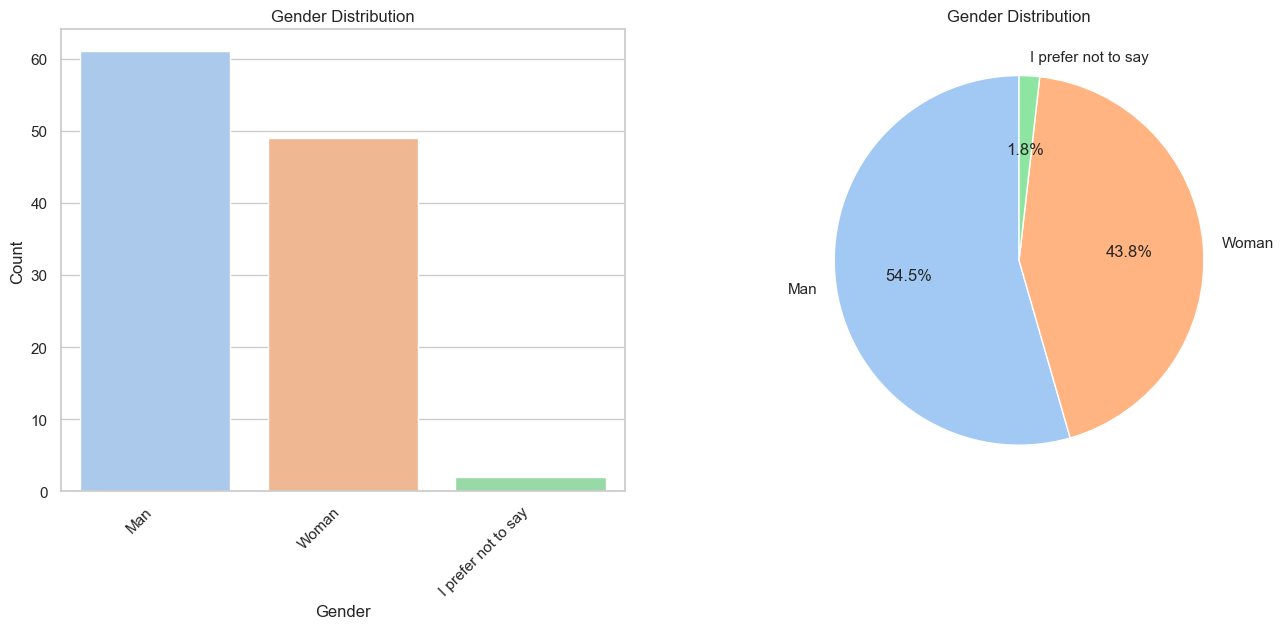

In [7]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Countplot
sns.countplot(x='gender', data=df, palette='pastel', ax=axes[0])

axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

custom_labels = ['Man', 'Woman', 'I prefer not to say']
custom_positions = [0, 1, 2]

axes[0].set_xticks(custom_positions)
axes[0].set_xticklabels(custom_labels, rotation=45, ha='right')

# Pie chart
gender_counts = df['gender'].value_counts()
axes[1].pie(gender_counts, labels=custom_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Gender Distribution')

plt.show()

C:\Users\cles\AppData\Local\Temp\ipykernel_17784\633784754.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=df, palette='pastel', order=age_order, ax=axes[0])
C:\Users\cles\AppData\Local\Temp\ipykernel_17784\633784754.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')  # Set rotation to 45 degrees


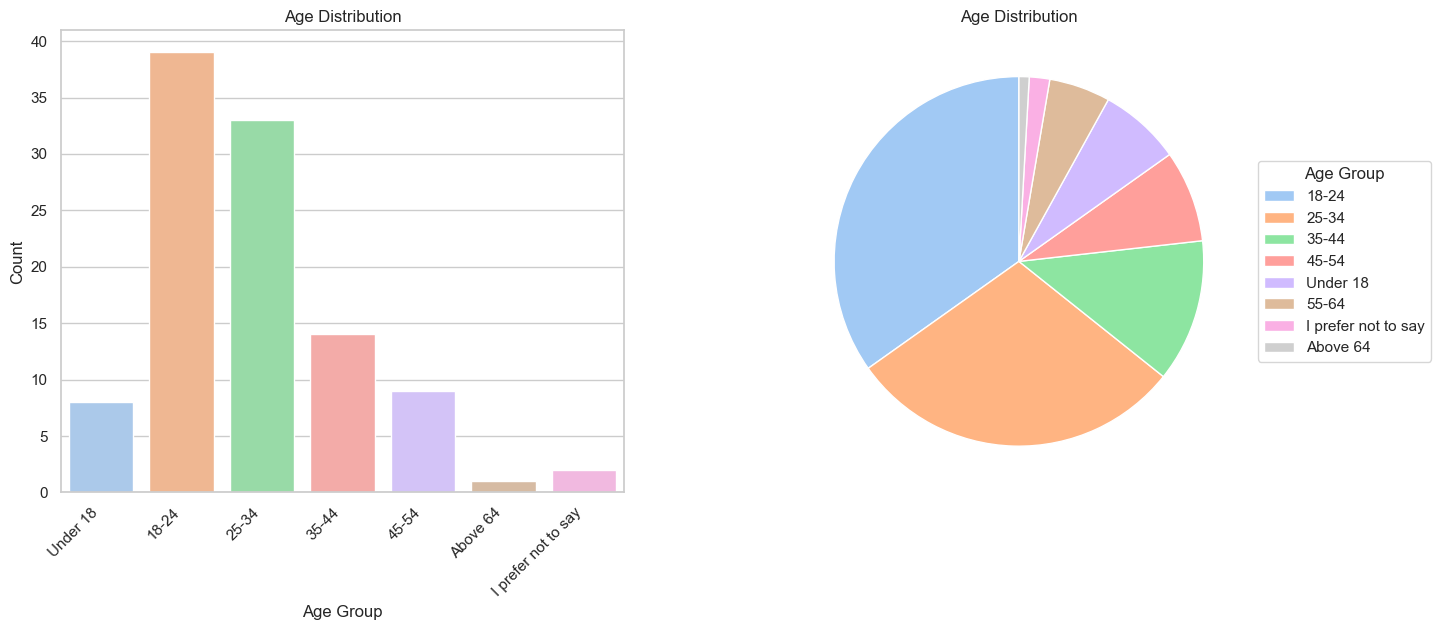

In [8]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Countplot
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', 'Above 64', 'I prefer not to say']
sns.countplot(x='age_group', data=df, palette='pastel', order=age_order, ax=axes[0])

axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')  # Set rotation to 45 degrees

# Pie chart
age_counts = df['age_group'].value_counts()
wedges, texts, autotexts = axes[1].pie(age_counts, labels=None, autopct='', startangle=90, colors=sns.color_palette('pastel'))

# Add a legend
axes[1].legend(wedges, age_counts.index, title='Age Group', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

axes[1].set_title('Age Distribution')
plt.show()

C:\Users\cles\AppData\Local\Temp\ipykernel_17784\163714247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='book_frequency', data=df, palette='pastel', order=frequency_order, ax=axes[0])
C:\Users\cles\AppData\Local\Temp\ipykernel_17784\163714247.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


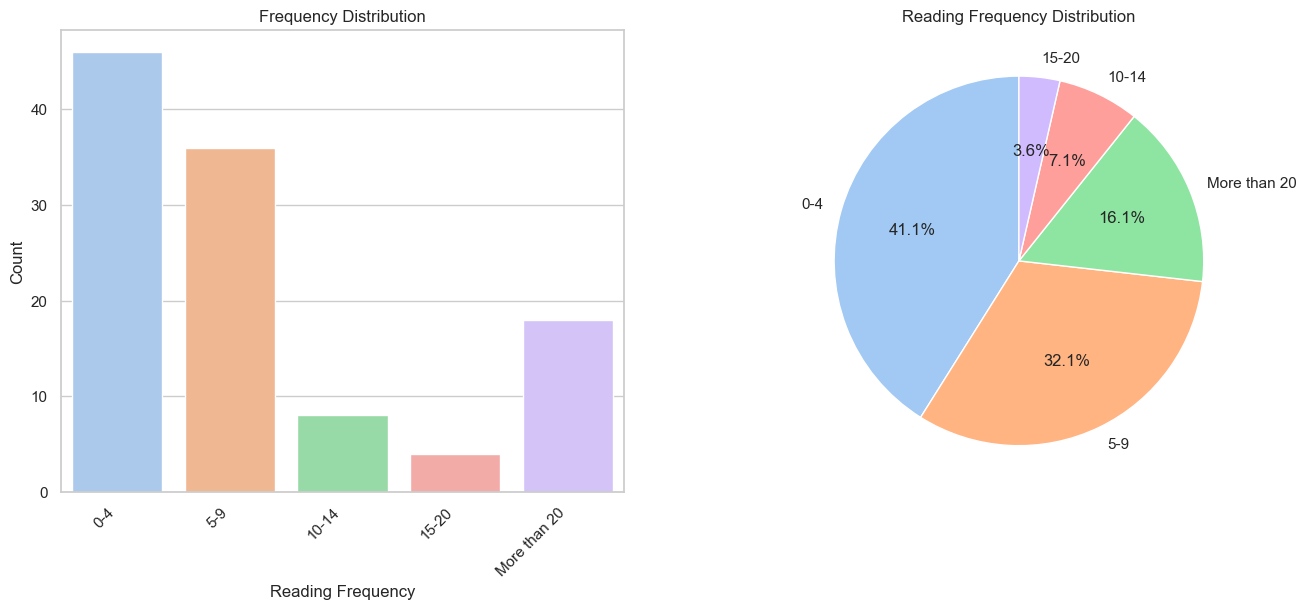

In [9]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Countplot
frequency_order = ['0-4', '5-9', '10-14', '15-20', 'More than 20']
sns.countplot(x='book_frequency', data=df, palette='pastel', order=frequency_order, ax=axes[0])

axes[0].set_title('Frequency Distribution')
axes[0].set_xlabel('Reading Frequency')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Pie chart
frequency_counts = df['book_frequency'].value_counts()
axes[1].pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Reading Frequency Distribution')

plt.show()

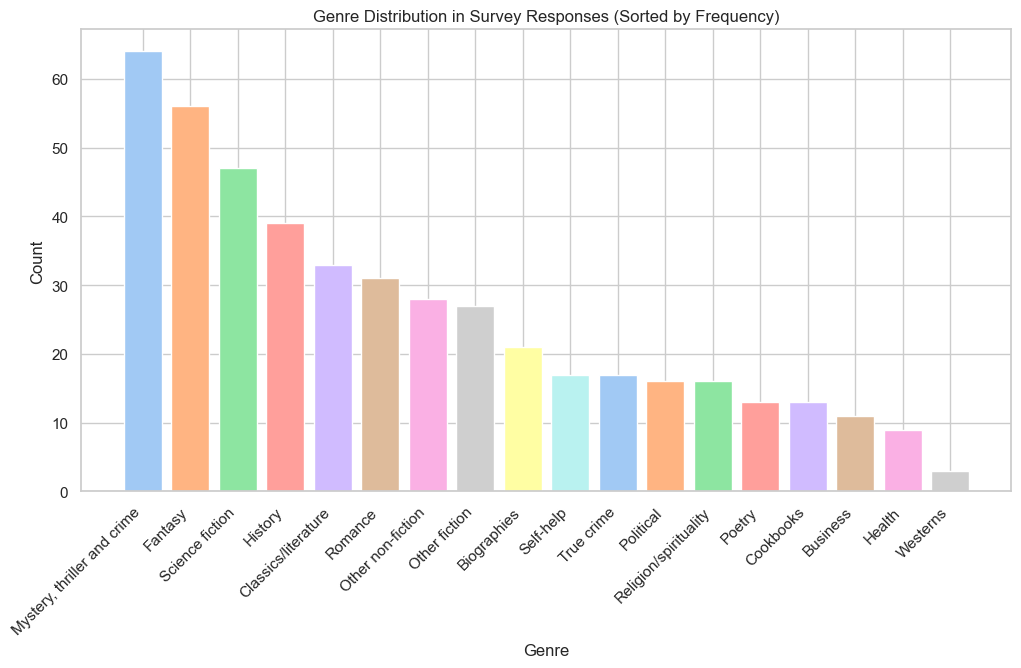

In [10]:
genre_counts = {}

for index, row in df.iterrows():
    # Access the 'genre column' value for the current row
    genres = eval(row['genre'])

    # Count genres
    for genre in genres:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Sorting genres by frequency in descending order
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Extracting sorted genres and counts
genres = [genre[0] for genre in sorted_genres]
counts = [genre[1] for genre in sorted_genres]

# Use seaborn color palette with matplotlib
custom_palette = sns.color_palette('pastel')

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(genres, counts, color=custom_palette)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution in Survey Responses (Sorted by Frequency)')
plt.xticks(rotation=45, ha='right')

plt.show()

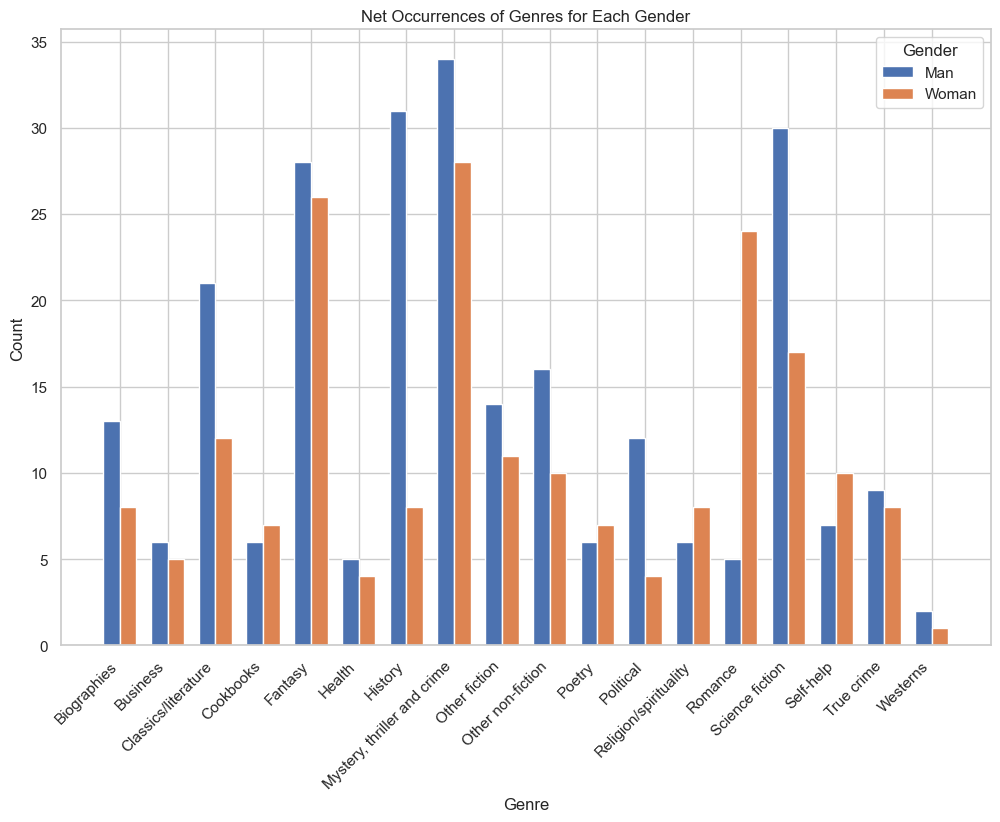

In [13]:
genre_counts = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Access the 'gender column' and 'genre column' values for the current row
    gender = ast.literal_eval(row['gender'])[0]  # Assuming gender is a single-item list
    genres = eval(row['genre'])

    # Count genres for the given gender
    for genre in genres:
        key = (gender, genre)
        if key in genre_counts:
            genre_counts[key] += 1
        else:
            genre_counts[key] = 1

# Filter out entries with gender 'I prefer not to say'
genre_counts = {key: value for key, value in genre_counts.items() if key[0] != 'I prefer not to say'}

# Extract unique genders and genres
genders = list(set(gender for gender, _ in genre_counts.keys()))
genres = list(set(genre for _, genre in genre_counts.keys()))

# Sort genres alphabetically for better visualization
genres.sort()

# Creating a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(genres))

for i, gender in enumerate(genders):
    counts = [genre_counts.get((gender, genre), 0) for genre in genres]
    plt.bar(index + i * bar_width, counts, bar_width, label=gender)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Net Occurrences of Genres for Each Gender')
plt.xticks(index + bar_width / 2, genres, rotation=45, ha='right')
plt.legend(title='Gender')

plt.show()

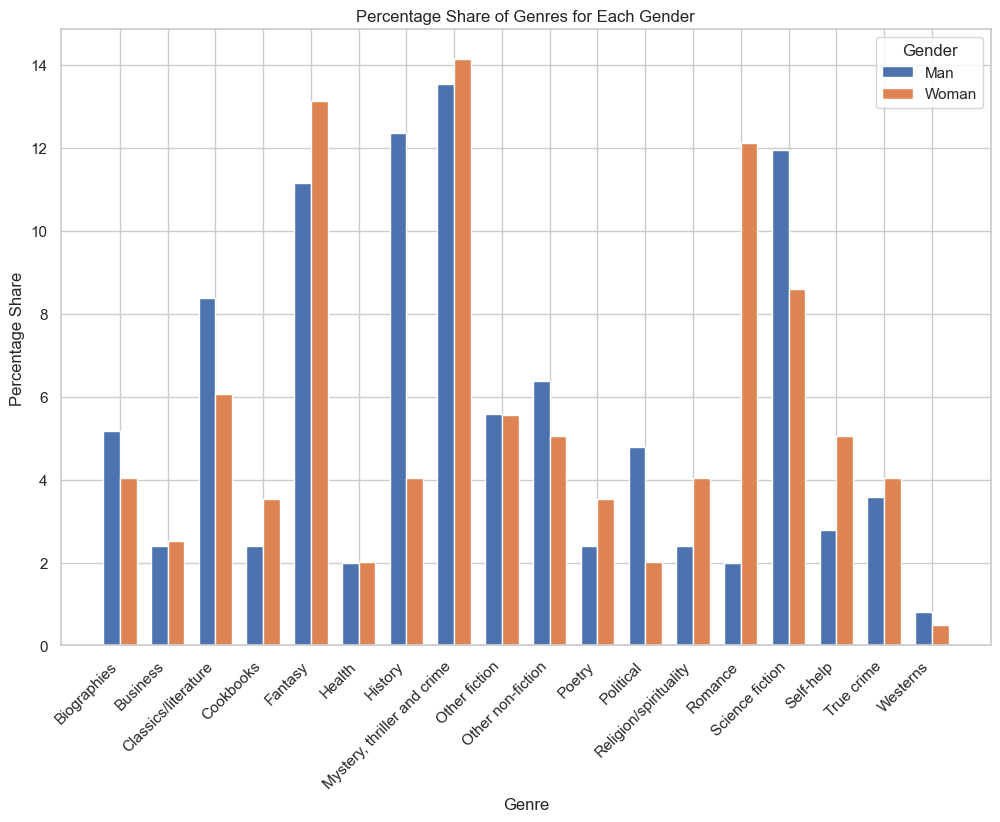

In [15]:
genre_counts = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Access the 'gender column' and 'genre column' values for the current row
    gender = ast.literal_eval(row['gender'])[0]
    genres = eval(row['genre'])

    # Count genres for the given gender
    for genre in genres:
        key = (gender, genre)
        if key in genre_counts:
            genre_counts[key] += 1
        else:
            genre_counts[key] = 1

# Filter out entries with gender 'I prefer not to say'
genre_counts = {key: value for key, value in genre_counts.items() if key[0] != 'I prefer not to say'}

# Calculate total counts for each gender
total_counts = {}
for (gender, _), count in genre_counts.items():
    if gender in total_counts:
        total_counts[gender] += count
    else:
        total_counts[gender] = count

# Calculate the percentage share for each genre
percentage_share = {key: value / total_counts[key[0]] * 100 for key, value in genre_counts.items()}

# Extract unique genders and genres
genders = list(set(gender for gender, _ in genre_counts.keys()))
genres = list(set(genre for _, genre in genre_counts.keys()))

# Sort genres alphabetically for better visualization
genres.sort()

# Creating a grouped bar chart with percentage share
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(genres))

for i, gender in enumerate(genders):
    counts = [percentage_share.get((gender, genre), 0) for genre in genres]
    plt.bar(index + i * bar_width, counts, bar_width, label=gender)

plt.xlabel('Genre')
plt.ylabel('Percentage Share')
plt.title('Percentage Share of Genres for Each Gender')
plt.xticks(index + bar_width / 2, genres, rotation=45, ha='right')
plt.legend(title='Gender')

plt.show()

C:\Users\cles\AppData\Local\Temp\ipykernel_17784\2066500589.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')  # Set rotation to 45 degrees


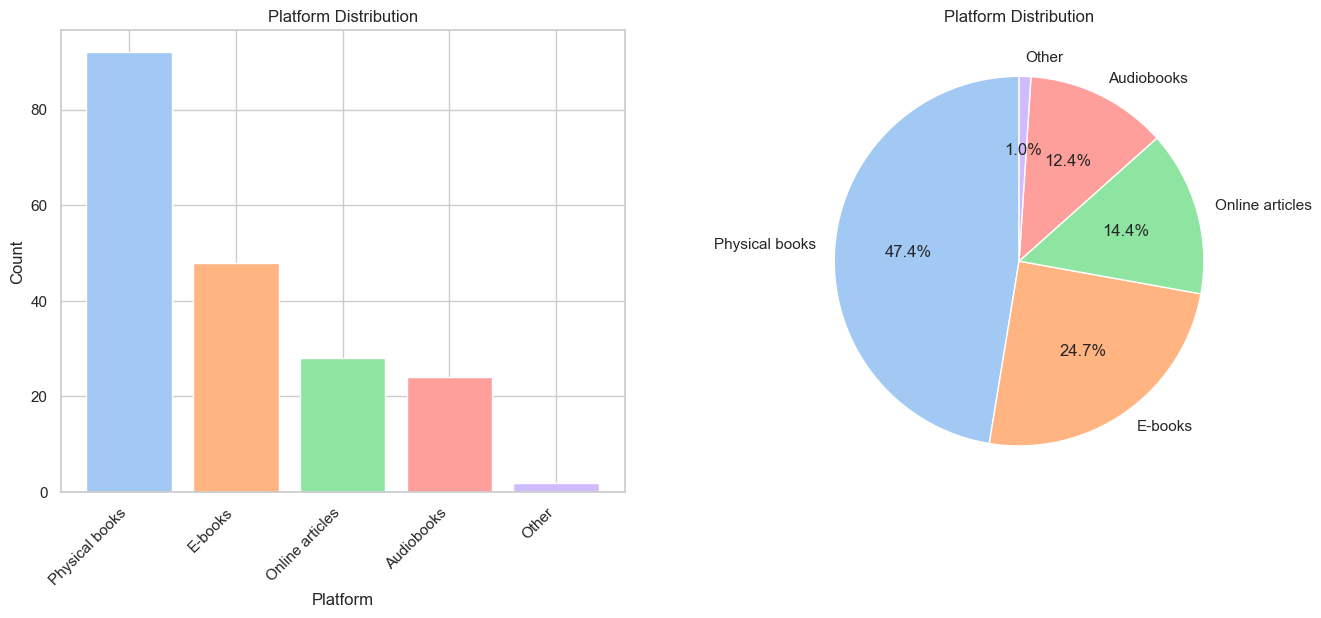

In [18]:
platform_count = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Access the 'reading_platform' value for the current row
    platforms = eval(row['reading_platform'])
    
    # Count platforms
    for platform in platforms:
        if platform in platform_count:
            platform_count[platform] += 1
        else:
            platform_count[platform] = 1

# Sorting platforms by frequency in descending order
sorted_platform = sorted(platform_count.items(), key=lambda x: x[1], reverse=True)

# Extracting sorted platforms and counts
platform = [platform[0] for platform in sorted_platform]
counts = [platform[1] for platform in sorted_platform]

# Use seaborn color palette with matplotlib
custom_palette = sns.color_palette('pastel')

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Bar chart
bars = axes[0].bar(platform, counts, color=custom_palette)
axes[0].set_xlabel('Platform')
axes[0].set_ylabel('Count')
axes[0].set_title('Platform Distribution')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')  # Set rotation to 45 degrees

# Pie chart
axes[1].pie(counts, labels=platform, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Platform Distribution')

plt.show()